# TO DO 

verifica se diade corretta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from skimage import data, color



random.seed(26)
np.random.seed(26)

# Visualizing dyad

## compute SVD

Image dimensions:  400 x 600


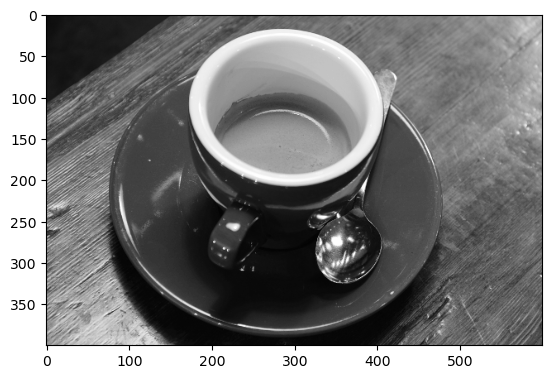

In [2]:
# Load and convert to grayscale
image = color.rgb2gray(data.coffee()) 
m, n = image.shape
print("Image dimensions: ", m,"x" ,n)
plt.imshow(image, cmap='gray')
plt.show()


In [3]:

U, S, Vt = np.linalg.svd(image, full_matrices=True) # if full_matrices=True, then U and Vt are not truncated

print(U.shape, S.shape, Vt.shape)

print("Rank of the matrix image = ",S.size)

(400, 400) (400,) (600, 600)
Rank of the matrix image =  400


## Visualize Dyads

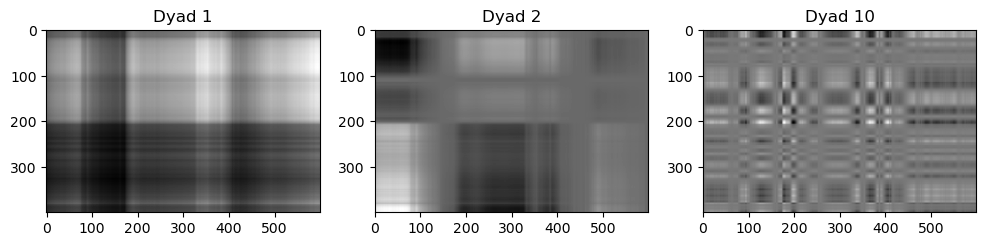

In [4]:
k_values = [1, 2, 10]
plt.figure(figsize=(12, 6))
for i, k in enumerate(k_values):
    dyad = np.outer(U[:, k - 1], Vt[k - 1, :])#-------ricorda che prendi dalla riga di Vt perche vuoi la colonna di V non trasposta
    plt.subplot(1, len(k_values), i + 1)
    plt.imshow(dyad, cmap="gray")
    plt.title(f"Dyad {k}")
plt.show()

## Plot Singular Values

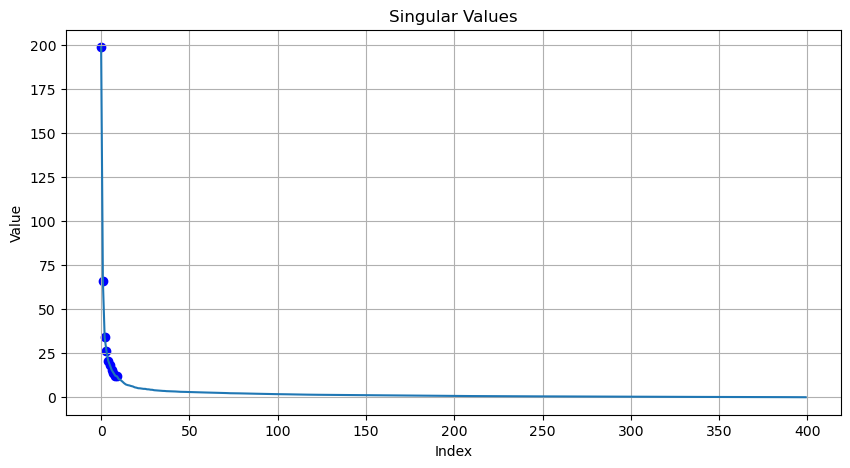

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(S)
plt.scatter(range(0,10),S[0:10],  color='blue', marker='o')
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid()
plt.show()

## Visualize k-Rank Approximations

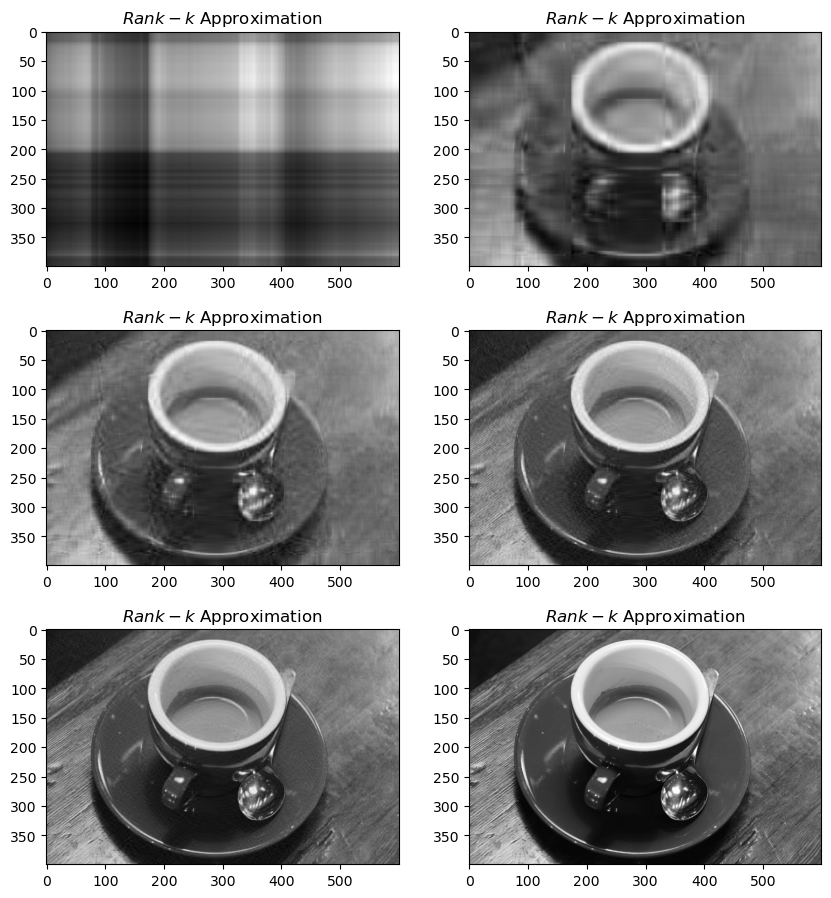

In [6]:
k_values = [1, 10, 25, 50, 100, 300]
plt.figure(figsize=(10, 11))
for i, k in enumerate(k_values):
    X_k = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    plt.subplot(3, 2, i + 1)
    plt.imshow(X_k, cmap="gray")
    plt.title(r"$Rank-{k}$ Approximation")
plt.show()

## Compute and Plot Approximation Error

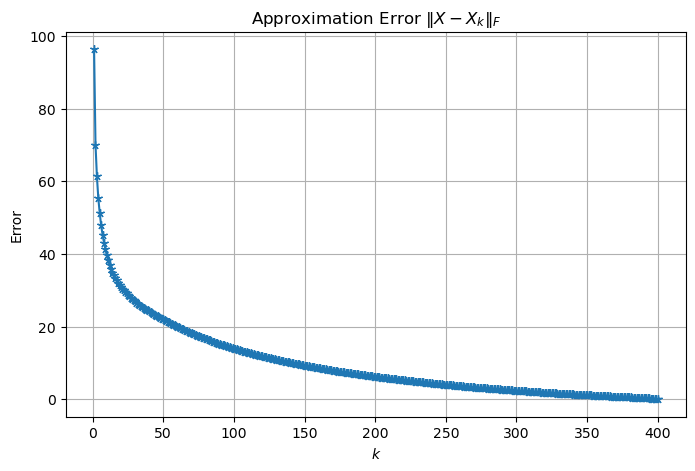

In [7]:
errors = []
for k in range(1, min(m, n) + 1):
    X_k = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    error = np.linalg.norm(image - X_k, ord="fro")
    errors.append(error)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(errors) + 1), errors,marker=(5, 2))
plt.title(r"Approximation Error $\|X - X_k\|_F$")
plt.xlabel(r"$k$")
plt.ylabel("Error")
plt.grid()
plt.show()

## Plot Compression Factor

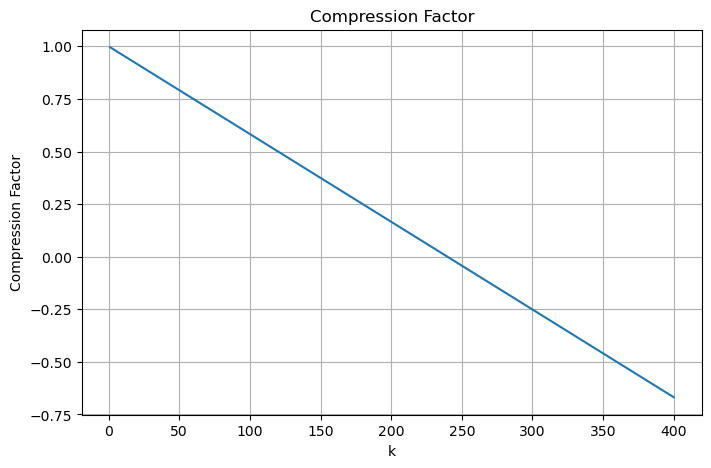

In [8]:
compression_factors = [1 - (k * (m + n + 1)) / (m * n) for k in range(1, min(m, n) + 1)]
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(compression_factors) + 1), compression_factors)
plt.title("Compression Factor")
plt.xlabel("k")
plt.ylabel("Compression Factor")
plt.grid()
plt.show()

## Find k where c_k = 0

In [9]:
k_c_x_testero = m * n // (m + n + 1)
error_at_c_zero = errors[k_c_x_testero - 1]

print(f"Compression factor c_k = 0 when k = {k_c_x_testero}")
print(f"Approximation error at c_k = 0: {error_at_c_zero:.4f}")

Compression factor c_k = 0 when k = 239
Approximation error at c_k = 0: 4.4009


Using a compressor factor k greater of 240 is worst of not compressing the image. Questo caso è raro e indicherebbe che la compressione ha aumentato la dimensione dei dati, il che non è desiderabile.  
the singular values  represent the amount of information contained in the corresponding singular vectors

# Classification of MNIST Digits with SVD Decomposition.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load and preprocess the MNIST dataset

In [11]:
ds = pd.read_csv("train.csv")
# Inspect the data
print(f"Shape of the data: {ds.shape}")
print("")
# Convert data into a matrix
data = np.array(ds)

X = data[:, 1:]
X = X.T
Y = data[:, 0]

print(X.shape, Y.shape)
ds.head()

Shape of the data: (42000, 785)

(784, 42000) (42000,)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


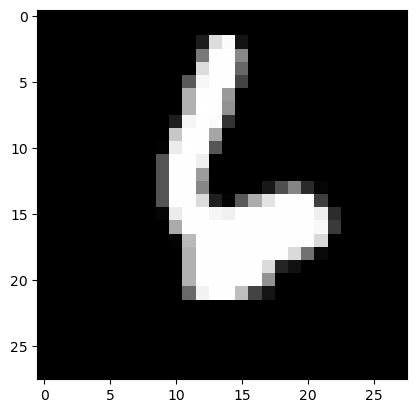

The associated digit is: 6


In [12]:
# Visualize the image of index 'idx' from the dataset 'X'

def visualize(X, idx):
    img = X[:, idx]
    img = np.reshape(img, (28, 28))# Reshape it
    plt.imshow(img, cmap='gray')
    plt.show()

# Visualize image
idx = 26
visualize(X, idx)
print(f"The associated digit is: {Y[idx]}")

In [13]:
# Function for filtering the dataset based on the label
def filter_dataset(X, Y, label):
    idx = np.zeros(Y.shape, dtype=bool)
    for i in range(len(label)):
        idx += Y == label[i]
    X_filtered = X[:, idx]
    Y_filtered = Y[idx]
    print(f"Shape of the original dataset: {X.shape} {Y.shape}")
    print(f"Shape of the filtered dataset: {X_filtered.shape} {Y_filtered.shape}")
    return X_filtered, Y_filtered

# split the data into training and testing sets
def split_data(X, Y, per_train=0.8):
    N_train = int(X.shape[1] * per_train)

    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[:, train_idx]
    Y_train = Y[train_idx]
    
    X_test = X[:, test_idx]
    Y_test = Y[test_idx]

    print(f"Train test split = {Y_train.size}, {Y_test.size}")

    return (X_train, Y_train), (X_test, Y_test)

def split_in_classes(X, Y, labels):
    classes = []
    for label in labels:
        classes.append(X[:, Y == label])
    print(f"Number of classes: {len(classes)}")
    return classes

# Project a vector x_test onto the subspace spanned by the columns of U
def project_onto_U(U, x_test):
    return U @ (U.T @ x_test)

# Classify a digit x_test as C1 or C2 based on the distances from the subspaces U1 and U2
def classify_digit(list_of_U, x_test, see = False):
    distances = []
    for i, U in enumerate(list_of_U):
        # Project x_test onto U
        x_proj = project_onto_U(U, x_test)
        # Distans x_test - x_proj
        d = np.linalg.norm(x_test - x_proj, 2)
        distances.append(d)
        if see:
            print(f"Distanza da U{i + 1}: {d}")
    
    # Return the index of the subspace with the smallest distance
    return np.argmin(distances) + 1

# Define the tax rate of misclassification of the test set
def misclassification_rate(list_of_U, labels, X_test, Y_test):
    N_test = X_test.shape[1]
    misclassifications = 0
    
    for i in range(N_test):
        z = X_test[:, i]
        true_label = Y_test[i]
        predicted_label = labels[classify_digit(list_of_U, z)-1]
        
        if predicted_label != true_label:
            misclassifications += 1
    
    MR = misclassifications / N_test
    return MR


In [14]:
# Extract digits 3 and 4
labels = [3, 4]
X_3_4, Y_3_4 = filter_dataset(X, Y, labels)
d, N = X_3_4.shape
print(f"Number of samples: {N}")

# Train Test split
(X_3_4_train, Y_3_4_train), (X_3_4_test, Y_3_4_test) = split_data(X_3_4, Y_3_4, 0.80)

# Split the data into classes
classes = split_in_classes(X_3_4_train, Y_3_4_train, labels)
X1, X2 = classes
print(X1[1].shape + X2[1].shape)

# Decomposition SVD
U1, S1, Vt1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, Vt2 = np.linalg.svd(X2, full_matrices=False)
print(f"Dimension of U1: {U1.shape}")
print(f"Dimension of U2: {U2.shape}")
list_of_U = [U1, U2]



Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 8423) (8423,)
Number of samples: 8423
Train test split = 6738, 1685
Number of classes: 2
(3494, 3244)
Dimension of U1: (784, 784)
Dimension of U2: (784, 784)


Distanza da U1: 4.85932268131574e-12
Distanza da U2: 6.064583516381193e-12
La cifra è classificata come: 3


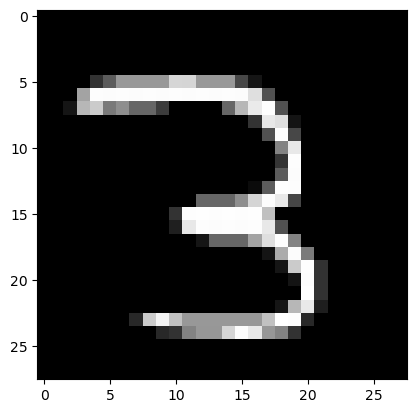

Distanza da U1: 5.731154988249421e-12
Distanza da U2: 7.602340374504795e-12
La cifra è classificata come: 3


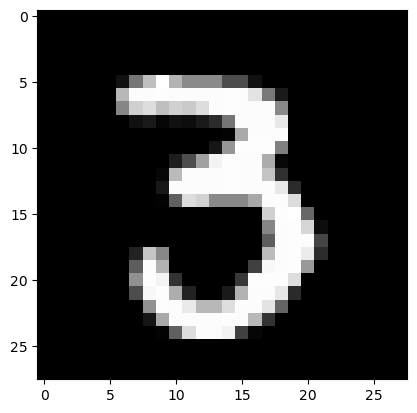

Distanza da U1: 7.1569276618739666e-12
Distanza da U2: 7.034073869721456e-12
La cifra è classificata come: 4


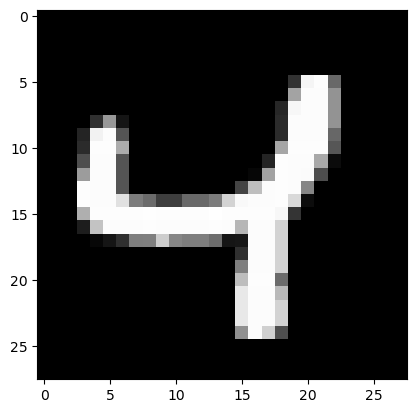

Distanza da U1: 4.700903867257207e-12
Distanza da U2: 4.669440680928217e-12
La cifra è classificata come: 4


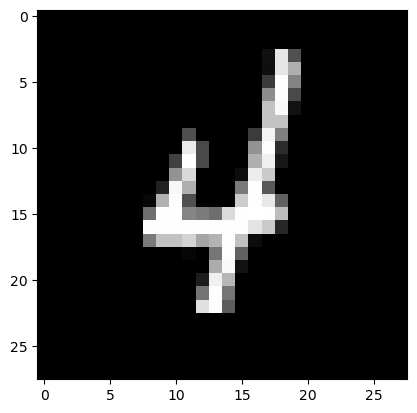

Distanza da U1: 5.522203484116685e-12
Distanza da U2: 4.520652861786071e-12
La cifra è classificata come: 4


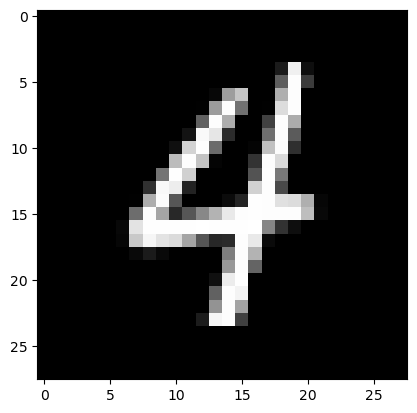

Distanza da U1: 6.194500249145658e-12
Distanza da U2: 5.9097638048091794e-12
La cifra è classificata come: 4


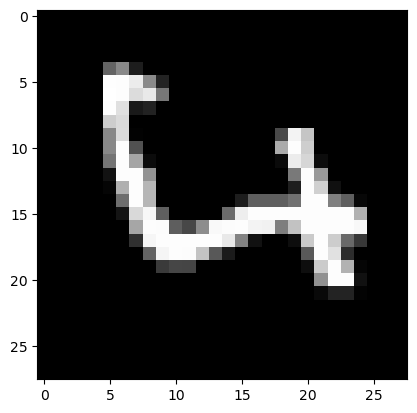

Distanza da U1: 5.234176333897623e-12
Distanza da U2: 4.350887752980556e-12
La cifra è classificata come: 4


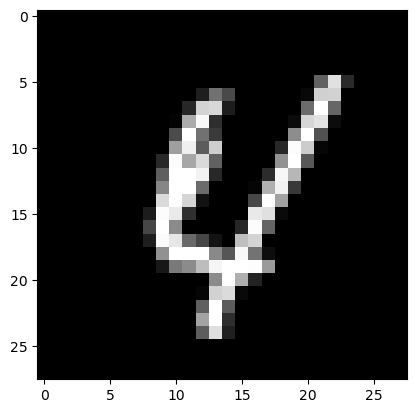

Distanza da U1: 6.889087930978429e-12
Distanza da U2: 5.160854657372864e-12
La cifra è classificata come: 4


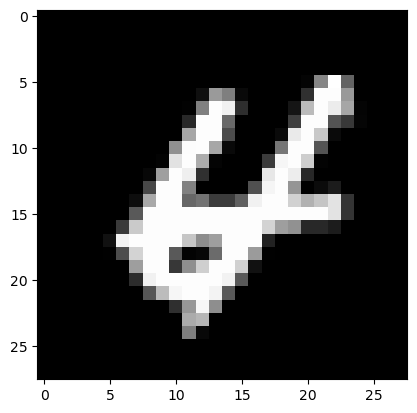

Distanza da U1: 7.012486183667798e-12
Distanza da U2: 5.4733551851087235e-12
La cifra è classificata come: 4


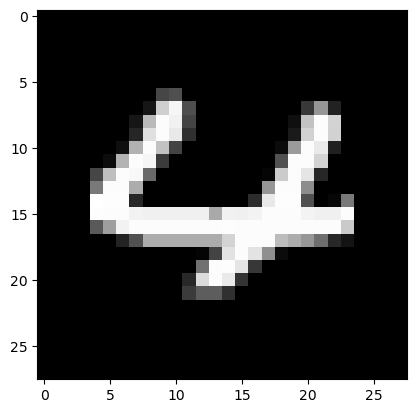

Distanza da U1: 6.8574681343376946e-12
Distanza da U2: 6.01502397871639e-12
La cifra è classificata come: 4


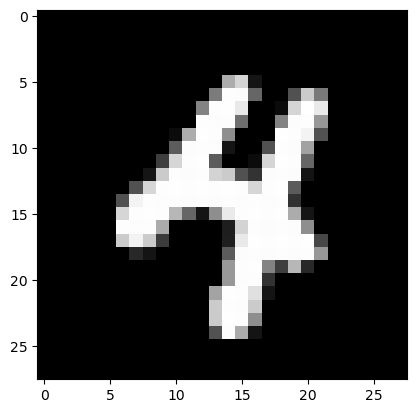

Distanza da U1: 5.4455452220694445e-12
Distanza da U2: 7.329338903070496e-12
La cifra è classificata come: 3


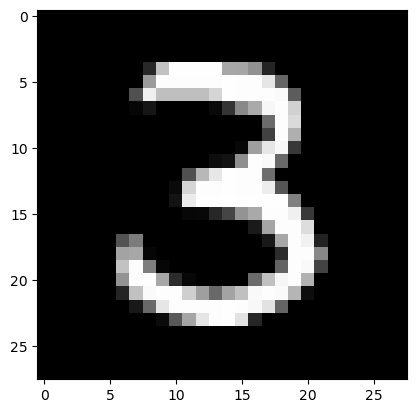

In [15]:
for i in range(0, 1001, 100):
    z = X_3_4_test[:, i]
    classe = classify_digit(list_of_U, z, see=True)
    print(f"La cifra è classificata come: {labels[classe-1]}")
    visualize(X_3_4_test, i)

In [16]:
MR = misclassification_rate(list_of_U, labels, X_3_4_test, Y_3_4_test)
print(f"Misclassification rate: {MR:.4f}")

Misclassification rate: 0.0641


In [17]:
# Extract digits
labels = [8, 9]
X_8_9, Y_8_9 = filter_dataset(X, Y, labels)
d, N = X_8_9.shape
print(f"Number of samples: {N}")

# Train Test split
(X_8_9_train, Y_8_9_train), (X_8_9_test, Y_8_9_test) = split_data(X_8_9, Y_8_9, 0.80)

# Split the data into classes
classes = split_in_classes(X_8_9_train, Y_8_9_train, labels)
X1, X2 = classes
print(X1[1].shape + X2[1].shape)

# Decomposition SVD
U1, S1, Vt1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, Vt2 = np.linalg.svd(X2, full_matrices=False)
print(f"Dimension of U1: {U1.shape}")
print(f"Dimension of U2: {U2.shape}")
list_of_U = [U1, U2]

MR = misclassification_rate(list_of_U, labels, X_8_9_test, Y_8_9_test)
print(f"Misclassification rate: {MR:.4f}")

Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 8251) (8251,)
Number of samples: 8251
Train test split = 6600, 1651
Number of classes: 2
(3277, 3323)
Dimension of U1: (784, 784)
Dimension of U2: (784, 784)
Misclassification rate: 0.2005


In [18]:
# Extract digits
labels = [0, 1]
X_0_1, Y_0_1 = filter_dataset(X, Y, labels)
d, N = X_0_1.shape
print(f"Number of samples: {N}")

# Train Test split
(X_0_1_train, Y_0_1_train), (X_0_1_test, Y_0_1_test) = split_data(X_0_1, Y_0_1, 0.80)

# Split the data into classes
classes = split_in_classes(X_0_1_train, Y_0_1_train, labels)
X1, X2 = classes
print(X1[1].shape + X2[1].shape)

# Decomposition SVD
U1, S1, Vt1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, Vt2 = np.linalg.svd(X2, full_matrices=False)
print(f"Dimension of U1: {U1.shape}")
print(f"Dimension of U2: {U2.shape}")
list_of_U = [U1, U2]

MR = misclassification_rate(list_of_U, labels, X_0_1_test, Y_0_1_test)
print(f"Misclassification rate: {MR:.4f}")

Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 8816) (8816,)
Number of samples: 8816
Train test split = 7052, 1764
Number of classes: 2
(3312, 3740)
Dimension of U1: (784, 784)
Dimension of U2: (784, 784)
Misclassification rate: 0.0023


In [19]:
# Extract digits
labels = [0, 8, 9]
X_0_8_9, Y_0_8_9 = filter_dataset(X, Y, labels)
d, N = X_0_8_9.shape
print(f"Number of samples: {N}")

# Train Test split
(X_0_8_9_train, Y_0_8_9_train), (X_0_8_9_test, Y_0_8_9_test) = split_data(X_0_8_9, Y_0_8_9, 0.80)

# Split the data into classes
classes = split_in_classes(X_0_8_9_train, Y_0_8_9_train, labels)
X1, X2, X3 = classes
print(X1[1].shape + X2[1].shape+ X3[1].shape)

# Decomposition SVD
U1, S1, Vt1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, Vt2 = np.linalg.svd(X2, full_matrices=False)
U3, S3, Vt3 = np.linalg.svd(X3, full_matrices=False)
print(f"Dimension of U1: {U1.shape}")
print(f"Dimension of U2: {U2.shape}")
print(f"Dimension of U3: {U3.shape}")
list_of_U = [U1, U2, U3]

MR = misclassification_rate(list_of_U, labels, X_0_8_9_test, Y_0_8_9_test)
print(f"Misclassification rate: {MR:.4f}")

Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 12383) (12383,)
Number of samples: 12383
Train test split = 9906, 2477
Number of classes: 3
(3277, 3254, 3375)
Dimension of U1: (784, 784)
Dimension of U2: (784, 784)
Dimension of U3: (784, 784)
Misclassification rate: 0.2523


In [20]:
# Extract digits
labels = [0, 1, 7]
X_0_1_7, Y_0_1_7 = filter_dataset(X, Y, labels)
d, N = X_0_1_7.shape
print(f"Number of samples: {N}")

# Train Test split
(X_0_1_7_train, Y_0_1_7_train), (X_0_1_7_test, Y_0_1_7_test) = split_data(X_0_1_7, Y_0_1_7, 0.80)

# Split the data into classes
classes = split_in_classes(X_0_1_7_train, Y_0_1_7_train, labels)
X1, X2, X3 = classes
print(X1[1].shape + X2[1].shape+ X3[1].shape)

# Decomposition SVD
U1, S1, Vt1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, Vt2 = np.linalg.svd(X2, full_matrices=False)
U3, S3, Vt3 = np.linalg.svd(X3, full_matrices=False)
print(f"Dimension of U1: {U1.shape}")
print(f"Dimension of U2: {U2.shape}")
print(f"Dimension of U3: {U3.shape}")
list_of_U = [U1, U2, U3]

MR = misclassification_rate(list_of_U, labels, X_0_1_7_test, Y_0_1_7_test)
print(f"Misclassification rate: {MR:.4f}")

Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 13217) (13217,)
Number of samples: 13217
Train test split = 10573, 2644
Number of classes: 3
(3305, 3792, 3476)
Dimension of U1: (784, 784)
Dimension of U2: (784, 784)
Dimension of U3: (784, 784)
Misclassification rate: 0.0189


# Clustering with PCA

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [22]:
def PCA(X_train, Y_train, labels, d = 784, k=2):
    """
    Compute the PCA.
    
    Parameters:
    X_train (numpy.ndarray): Train set.
    Y_train (numpy.ndarray): Train set.
    labels list(int): List of labels.
    d (int): Dimension of the data.
    k (int): Dimension of the low-dimensional space.
    
    Returns:
    Z_train numpy.ndarray: Train set projected into the low-dimensional space.
    list_centroid_clusters_projections list(numpy.ndarray): List of centroids of the clusters projected into the low-dimensional space.
    P (numpy.ndarray): Projection matrix obtained from the training set.
    """
    # Compute centroid
    cX = np.mean(X_train, axis=1)

    # Make it a column vector
    cX = np.reshape(cX, (d, 1))

    # Center the data
    Xc = X_train - cX

    # Compute SVD decomposition
    U, s, VT = np.linalg.svd(Xc, full_matrices=False)

    # Compute reduced SVD
    Uk = U[:, :k]

    # Define projection matrix
    P = Uk.T

    # Project X_train -> Z_train
    Z_train = P @ X_train

    # Project centroid clusters
    list_centroid_clusters_projections = []
    for label in labels:
        Zn = Z_train[:, Y_train == label]
        cX = np.mean(Zn, axis=1)
        list_centroid_clusters_projections.append(cX)
    return Z_train, list_centroid_clusters_projections, P 

def average_distance_of_clusters_from_centroid(Z, Y_train, centroids):
    """
    Compute the average distance of each data of the cluster from its centroid.
    
    Returns:
    dict: Average distance of each cluster from its centroid.
    """
    distances = {}
    labels = np.unique(Y_train)
    
    for i,label in enumerate(labels):
        cluster = Z[:, Y_train == label]
        centroid = centroids[i]
        for data in cluster.T:
            distance = np.linalg.norm(data.ravel() - centroid.ravel())
            average_distance = round(np.mean(distance),3)
            distances[label] = average_distance
    
    return distances

def project_test_set(X_test, P):
    """
    Project the test set X_test into the low-dimensional space using the projection matrix P.
    
    Parameters:
    X_test (numpy.ndarray): Test set.
    P (numpy.ndarray): Projection matrix obtained from the training set.
    
    Returns:
    numpy.ndarray: Test set projected into the low-dimensional space.
    """
    Z_test = P @ X_test
    return Z_test

def classify_based_on_centroid(x, centroids, labels):
    """
    Classify a new observation x based on the distance to cluster centroids.
    
    Parameters:
    x (numpy.ndarray): New observation.
    centroids (list): List of coordinates of the cluster centroids.
    
    Returns:
    int: The class corresponding to the closest centroid.
    """
    distances = [np.linalg.norm(x.ravel() - centroid.ravel()) for centroid in centroids]
    return labels[np.argmin(distances)]

def predict(X_test, centroids, labels):
    """
    Predict the labels of the test set.
    
    Parameters:
    X_test (numpy.ndarray): Test set.
    centroids (list): List of coordinates of the cluster centroids.
    labels (list): List of labels.
    
    Returns:
    numpy.ndarray: Predicted labels.
    """
    N_test = X_test.shape[1]
    Y_pred = np.zeros(N_test)
    
    for i in range(N_test):
        x = X_test[:, i]
        Y_pred[i] = classify_based_on_centroid(x, centroids, labels)
    
    return np.array(Y_pred)

def evaluation_PCA(X_test, Y_test, centroids, labels):
    """
    Compute the misclassification rate of the classification algorithm on the test set.
    
    Parameters:
    X_test (numpy.ndarray): Test set.
    Y_test (numpy.ndarray): True labels of the test set.
    centroids (list): List of coordinates of the cluster centroids.
    labels (list): List of labels.
    
    Returns:
    float: Misclassification rate.
    float: Accuracy.
    """
    misclassifications = 0
    N_test = X_test.shape[1]
    Y_pred = predict(X_test, centroids, labels)
    
    return np.mean(Y_test!=Y_pred), np.mean(Y_test==Y_pred)

# Visualize the clusters
def visualize_2D(Z, Y, list_centroid_clusters_projections):
    labels = np.unique(Y)
    ax = plt.scatter(Z[0, :], Z[1, :], c=Y)
    plt.legend(*ax.legend_elements(), title="Digit") # Add to the legend the list of digits
    for i, Z_centroid in enumerate(list_centroid_clusters_projections):
        plt.scatter(Z_centroid[0], Z_centroid[1], c='red', marker='v')
        plt.text(Z_centroid[0], Z_centroid[1], f'Centroid {labels[i]}', fontsize=10, color='red', ha='right')   
    plt.xlabel(r"$z_1$")
    plt.ylabel(r"$z_2$")
    plt.title("PCA projection of MNIST digits 0-9")
    plt.grid()
    plt.show()

def visualize_3D(Z, Y, list_centroid_clusters_projections):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Identify the clasters
    labels = np.unique(Y)
    for i,label in enumerate(labels):
        cluster = Z[:, Y == label]
        ax.scatter(cluster[0, :], cluster[1, :], cluster[2, :], label=f'Digit {label}', alpha=0.1)
        
        # Calculate the centroid
        centroid = list_centroid_clusters_projections[i]
        ax.scatter(centroid[0], centroid[1], centroid[2], marker='v', s=200, c='red') 
        ax.text(centroid[0], centroid[1], centroid[2], f'Centroid {label}', fontsize=12, color='red', ha='right')

    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.legend()
    plt.title('PCA Projection and Cluster Centroids in 3D')
    plt.show()

## Create train and test

In [23]:
ds = pd.read_csv("train.csv")
# Inspect the data
print(f"Shape of the data: {ds.shape}")
print("")
# Convert data into a matrix
data = np.array(ds)

X = data[:, 1:]
X = X.T
Y = data[:, 0]

print(X.shape, Y.shape)
ds.head()

Shape of the data: (42000, 785)

(784, 42000) (42000,)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Extract digits
labels = [0, 6, 9]
X_0_6_9, Y_0_6_9 = filter_dataset(X, Y, labels)
d, N = X_0_6_9.shape
print(f"Number of samples: {N}")

# Train Test split
(X_0_6_9_train, Y_0_6_9_train), (X_0_6_9_test, Y_0_6_9_test) = split_data(X_0_6_9, Y_0_6_9, 0.8 )


Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 12457) (12457,)
Number of samples: 12457
Train test split = 9965, 2492


In [25]:
Z_0_6_9_train_k2, proj_centr_clust_k2, P = PCA(X_0_6_9_train, Y_0_6_9_train, labels, d, 2)
Z_0_6_9_train_k2.shape
for i in proj_centr_clust_k2:
    print(i)

[1417.07889119 -553.66246064]
[ 208.3433863  -919.35406435]
[-74.00459344 -92.91818493]


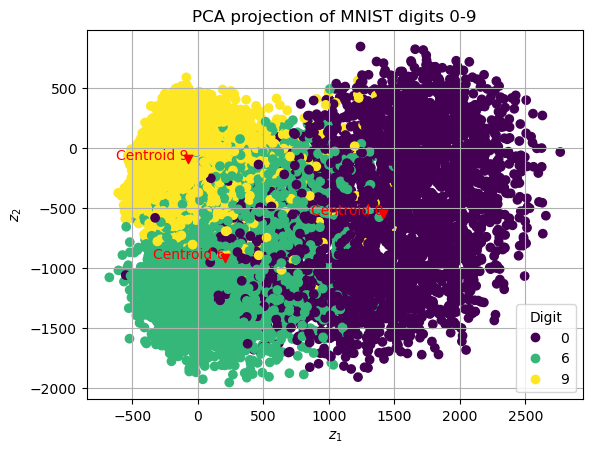

In [26]:
visualize_2D(Z_0_6_9_train_k2, Y_0_6_9_train, proj_centr_clust_k2)

In [27]:
distances_train_0_6_9_k2 = average_distance_of_clusters_from_centroid(Z_0_6_9_train_k2, Y_0_6_9_train, proj_centr_clust_k2)
print(f"Average distance of each data of the cluster from its centroid: {distances_train_0_6_9_k2}")

# Project the test set into the low-dimensional space
Z_0_6_9_test_k2 = project_test_set(X_0_6_9_test, P)
print("Projection of test into the low-dimensional space:", Z_0_6_9_test_k2.shape)

# Compute the average distance of each cluster of X_test from the train centroid
distances_test_0_6_9_k2 = average_distance_of_clusters_from_centroid(Z_0_6_9_test_k2, Y_0_6_9_test, proj_centr_clust_k2)
print("Mean distance from test clusters and the realtive train centroid:", distances_test_0_6_9_k2)

# Misclassification rate of the test set
MR_0_6_9_k2, acc_0_6_9_k2 = evaluation_PCA(Z_0_6_9_test_k2, Y_0_6_9_test, proj_centr_clust_k2, labels)
print(f"Misclassification rate: {MR_0_6_9_k2:.4f}, Accuracy: {acc_0_6_9_k2:.4f}")

Average distance of each data of the cluster from its centroid: {0: 827.042, 6: 1002.328, 9: 270.301}
Projection of test into the low-dimensional space: (2, 2492)
Mean distance from test clusters and the realtive train centroid: {0: 512.304, 6: 118.165, 9: 482.46}
Misclassification rate: 0.1485, Accuracy: 0.8515


Centroids projections in 3D:
point: [1417.07889119 -553.66246064  129.55405476]
point: [ 208.3433863  -919.35406435 -537.14238513]
point: [-74.00459344 -92.91818493 240.75449413]


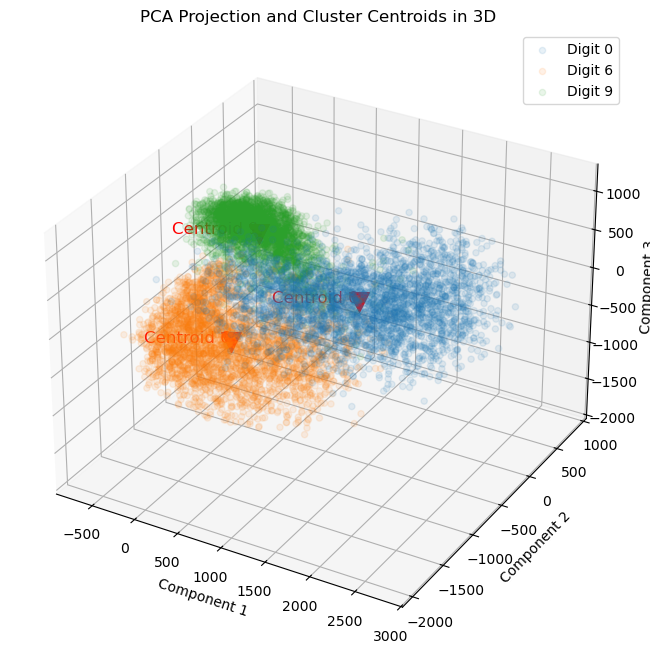

In [28]:
Z_0_6_9_train_k3, proj_centr_clust_k3, P = PCA(X_0_6_9_train, Y_0_6_9_train, labels, d, 3)
Z_0_6_9_train_k3.shape
print("Centroids projections in 3D:")
for i in proj_centr_clust_k3:
    print(f"point: {i}")
visualize_3D(Z_0_6_9_train_k3, Y_0_6_9_train, proj_centr_clust_k3)

Calcolare la PCA di X_train: Utilizza l'algoritmo PCA per ridurre la dimensionalità di X_train a un valore fisso k.

Visualizzare i risultati: Visualizza i dati proiettati in due dimensioni (per k=2).

Identificare i cluster: Proietta X_train nella sua versione a bassa dimensione Z_train utilizzando la PCA e poi suddividi Z_train in insiemi (ad esempio, Z1, Z2, Z3) in base alla cifra rappresentata prima della proiezione PCA.

Calcolare e visualizzare i centroidi: Calcola il centroide di ciascun cluster e visualizza la posizione dei centroidi.

In [29]:
# Compute the average distance of each cluster of X_train from its centroid
distances_train_0_6_9_k3 = average_distance_of_clusters_from_centroid(Z_0_6_9_train_k3, Y_0_6_9_train, proj_centr_clust_k3)
print("Mean distance from train clusters and its centroid:", distances_train_0_6_9_k3)

# Project the test set into the low-dimensional space
Z_0_6_9_test_k3 = project_test_set(X_0_6_9_test, P)
print("Projection of test into the low-dimensional space:", Z_0_6_9_test_k3.shape)

# Compute the average distance of each cluster of X_test from the train centroid
distances_test_0_6_9_k3 = average_distance_of_clusters_from_centroid(Z_0_6_9_test_k3, Y_0_6_9_test, proj_centr_clust_k3)
print("Mean distance from test clusters and the realtive train centroid:", distances_test_0_6_9_k3)

# Compute the misclassification rate on the test set
MR_0_6_9_k3,acc_0_6_9_k3 = evaluation_PCA(Z_0_6_9_test_k3, Y_0_6_9_test, proj_centr_clust_k3, labels)
print(f"Misclassification rate: {MR_0_6_9_k3:.4f}, Accuracy: {acc_0_6_9_k3:.4f}")

Mean distance from train clusters and its centroid: {0: 899.877, 6: 1002.334, 9: 292.525}
Projection of test into the low-dimensional space: (3, 2492)
Mean distance from test clusters and the realtive train centroid: {0: 759.507, 6: 184.213, 9: 531.18}
Misclassification rate: 0.0730, Accuracy: 0.9270


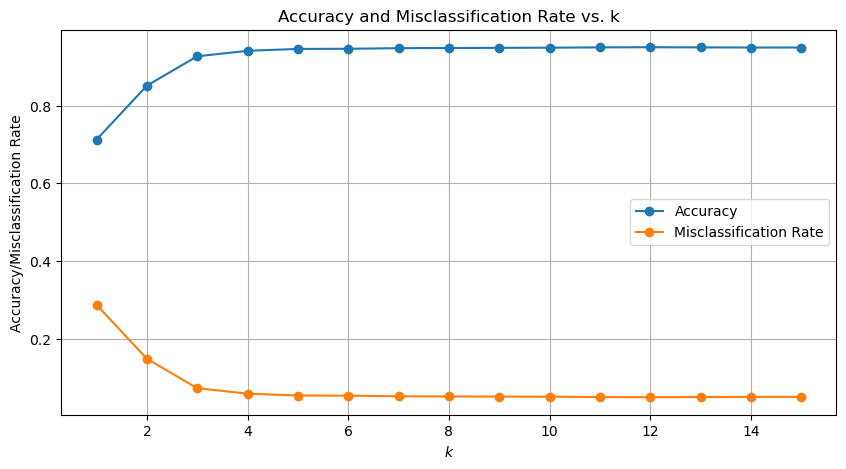

In [30]:
kk = np.arange(1, 16)
accuracy_l = []
mr_l = []
for k in kk:
    Z_0_6_9_train_k, proj_centr_clust_k, P_k = PCA(X_0_6_9_train, Y_0_6_9_train, labels, d, k)
    Z_0_6_9_test_k = project_test_set(X_0_6_9_test, P_k)
    MR, Acc = evaluation_PCA(Z_0_6_9_test_k, Y_0_6_9_test, proj_centr_clust_k, labels)
    accuracy_l.append(Acc)
    mr_l.append(MR)

plt.figure(figsize=(10, 5))
plt.plot(kk, accuracy_l, marker='o', label='Accuracy')
plt.plot(kk, mr_l, marker='o', label='Misclassification Rate')
plt.title("Accuracy and Misclassification Rate vs. k")
plt.xlabel(r'$k$')
plt.ylabel("Accuracy/Misclassification Rate")
plt.legend()
plt.grid()
plt.show()



Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 13217) (13217,)
Number of samples: 13217
Train test split = 10573, 2644


<function matplotlib.pyplot.show(close=None, block=None)>

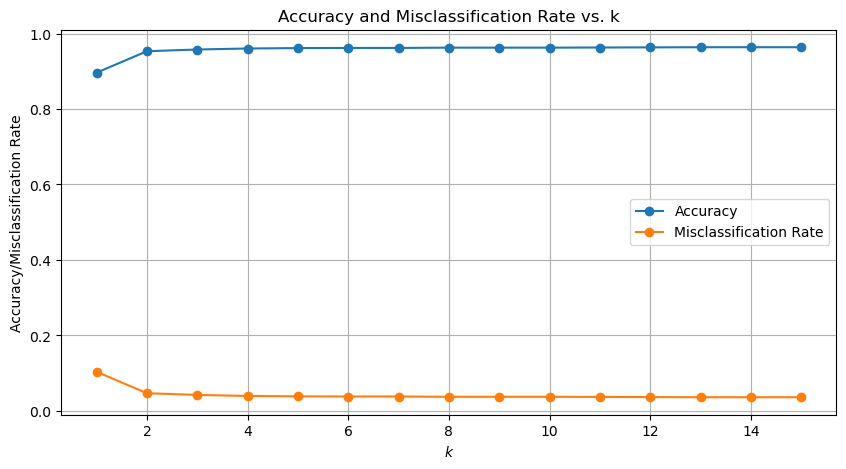

In [31]:
# Extract digits
labels = [0, 1, 7]
X_0_1_7, Y_0_1_7 = filter_dataset(X, Y, labels)
d, N = X_0_1_7.shape
print(f"Number of samples: {N}")
# Train Test split
(X_0_1_7_train, Y_0_1_7_train), (X_0_1_7_test, Y_0_1_7_test) = split_data(X_0_1_7, Y_0_1_7, 0.8 )

kk = np.arange(1, 16)
accuracy_l = []
mr_l = []
for k in kk:
    Z_0_1_7_train_k, proj_centr_clust_k, P_k = PCA(X_0_1_7_train, Y_0_1_7_train, labels, d, k)
    Z_0_1_7_test_k = project_test_set(X_0_1_7_test, P_k)
    MR, Acc = evaluation_PCA(Z_0_1_7_test_k, Y_0_1_7_test, proj_centr_clust_k, labels)
    accuracy_l.append(Acc)
    mr_l.append(MR)

plt.figure(figsize=(10, 5))
plt.plot(kk, accuracy_l, marker='o', label='Accuracy')
plt.plot(kk, mr_l, marker='o', label='Misclassification Rate')
plt.title("Accuracy and Misclassification Rate vs. k")
plt.xlabel(r'$k$')
plt.ylabel("Accuracy/Misclassification Rate")
plt.legend()
plt.grid()
plt.show

Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 42000) (42000,)
Number of samples: 42000
Train test split = 33600, 8400


<function matplotlib.pyplot.show(close=None, block=None)>

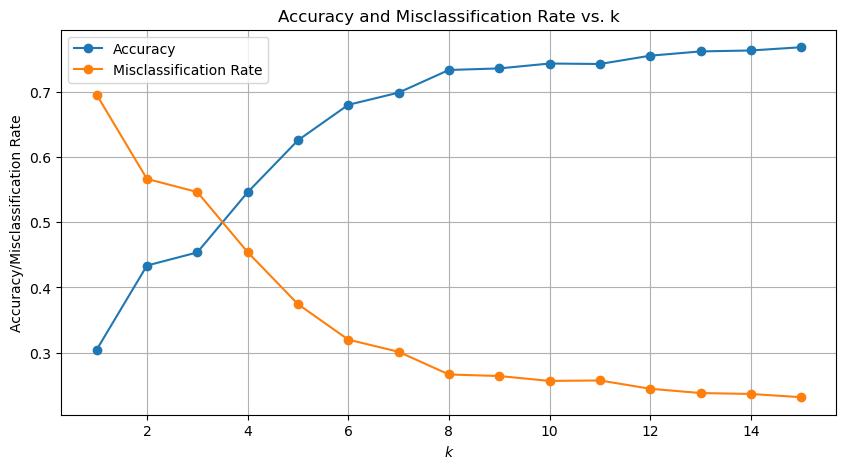

In [32]:
# Extract digits
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X_all, Y_all = filter_dataset(X, Y, labels)
d, N = X_all.shape
print(f"Number of samples: {N}")
# Train Test split
(X_all_train, Y_all_train), (X_all_test, Y_all_test) = split_data(X_all, Y_all, 0.8 )

kk = np.arange(1, 16)
accuracy_l = []
mr_l = []
for k in kk:
    Z_all_train_k, proj_centr_clust_k, P_k = PCA(X_all_train, Y_all_train, labels, d, k)
    Z_all_test_k = project_test_set(X_all_test, P_k)
    MR, Acc = evaluation_PCA(Z_all_test_k, Y_all_test, proj_centr_clust_k, labels)
    accuracy_l.append(Acc)
    mr_l.append(MR)

plt.figure(figsize=(10, 5))
plt.plot(kk, accuracy_l, marker='o', label='Accuracy')
plt.plot(kk, mr_l, marker='o', label='Misclassification Rate')
plt.title("Accuracy and Misclassification Rate vs. k")
plt.xlabel(r'$k$')
plt.ylabel("Accuracy/Misclassification Rate")
plt.legend()
plt.grid()
plt.show